In [1]:
import cifar10_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
checkpoint_dir = 'data/cifar_checkpoints'
checkpoint_path = tf.train.latest_checkpoint(checkpoint_dir)

In [3]:
print(checkpoint_path)

data/cifar_checkpoints\cifar.ckpt-600


In [5]:
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    loader = tf.train.import_meta_graph(checkpoint_path+'.meta')
    loader.restore(sess, checkpoint_path)
    
    loaded_input = loaded_graph.get_tensor_by_name("input_:0")
    loaded_labels = loaded_graph.get_tensor_by_name("labels_:0")
    loaded_keep_prob = loaded_graph.get_tensor_by_name("keep_prob:0")
    loaded_acc = loaded_graph.get_tensor_by_name("accuracy:0")
    loaded_pred = loaded_graph.get_tensor_by_name("prediction:0")
    
    batch = cifar10_data.load_preprocess_batch_data(1)
    test_images = batch['test_images']
    test_labels = batch['test_labels']
    test_acc, pred = sess.run([loaded_acc,loaded_pred], feed_dict={loaded_input:test_images, loaded_labels:test_labels, loaded_keep_prob:1.0})
    print("Batch 1: test_acc {:.4f}".format(test_acc))

INFO:tensorflow:Restoring parameters from data/cifar_checkpoints\cifar.ckpt-600
Batch 1: test_acc 0.5880


The fist 9 images: ['deer', 'bird', 'bird', 'truck', 'airplane', 'cat', 'cat', 'automobile', 'cat']
Prediction: ['frog', 'bird', 'frog', 'automobile', 'airplane', 'cat', 'ship', 'automobile', 'bird']


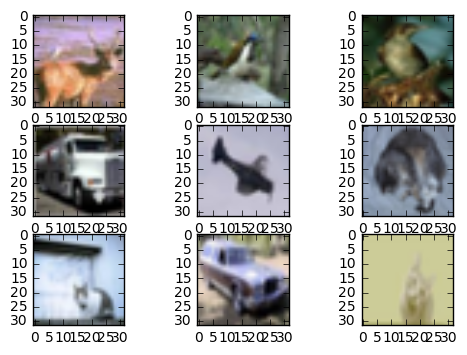

In [8]:
%matplotlib inline
print('The fist 9 images: {}'.format([cifar10_data.label_names[i] for i in np.argmax(test_labels[:9],axis=1)]))
print('Prediction: {}'.format([cifar10_data.label_names[i] for i in np.argmax(pred[:9],axis=1)]))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[i])
plt.show()

In [9]:
checkpoint_path = tf.train.latest_checkpoint(checkpoint_dir)
print(checkpoint_path)
ckpt_name = 'data/cifar_checkpoints/cifar.ckpt'

data/cifar_checkpoints\cifar.ckpt-2000


In [20]:
epochs = 10
n_batches = 5
batch_size = 200
prob = 0.5

In [21]:
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    loader = tf.train.import_meta_graph(checkpoint_path+'.meta')
    loader.restore(sess, checkpoint_path)
    
    loaded_input = loaded_graph.get_tensor_by_name("input_:0")
    loaded_labels = loaded_graph.get_tensor_by_name("labels_:0")
    loaded_keep_prob = loaded_graph.get_tensor_by_name("keep_prob:0")
    loaded_acc = loaded_graph.get_tensor_by_name("accuracy:0")
    loaded_pred = loaded_graph.get_tensor_by_name("prediction:0")
    loaded_step = loaded_graph.get_tensor_by_name("global_step:0")
    loaded_cost = loaded_graph.get_tensor_by_name("cost:0")
    loaded_opt = loaded_graph.get_tensor_by_name("Adam:0")
    
    
    for e in range(epochs):
        for i in range(1, n_batches + 1):
            for images,labels in cifar10_data.load_preprocess_batch(i, batch_size):
                loss, _, global_step = sess.run([loaded_cost, loaded_opt,loaded_step], feed_dict={loaded_input:images, loaded_labels:labels, loaded_keep_prob:prob})
                print("Epoch {}, Batch {}, Iteration {}: cost {:.5f}".format(e+1, i, global_step, loss))
            batch = cifar10_data.load_preprocess_batch_data(i)
            valid_images = batch['valid_images']
            valid_labels = batch['valid_labels']
            val_acc = sess.run(loaded_acc, feed_dict={loaded_input:valid_images, loaded_labels:valid_labels, loaded_keep_prob:1.0})
            print("Epoch {}, Batch {}: val_acc {:.4f}".format(e+1, i, val_acc))
        loader.save(sess, ckpt_name, global_step=loaded_step)

INFO:tensorflow:Restoring parameters from data/cifar_checkpoints\cifar.ckpt-2000
Epoch 1, Batch 1, Iteration 2001: cost 0.66372
Epoch 1, Batch 1, Iteration 2002: cost 0.79370
Epoch 1, Batch 1, Iteration 2003: cost 0.58911
Epoch 1, Batch 1, Iteration 2004: cost 0.81529
Epoch 1, Batch 1, Iteration 2005: cost 0.84254
Epoch 1, Batch 1, Iteration 2006: cost 0.76493
Epoch 1, Batch 1, Iteration 2007: cost 0.64471
Epoch 1, Batch 1, Iteration 2008: cost 0.80436
Epoch 1, Batch 1, Iteration 2009: cost 0.79249
Epoch 1, Batch 1, Iteration 2010: cost 0.75015
Epoch 1, Batch 1, Iteration 2011: cost 0.67862
Epoch 1, Batch 1, Iteration 2012: cost 0.64285
Epoch 1, Batch 1, Iteration 2013: cost 0.72641
Epoch 1, Batch 1, Iteration 2014: cost 0.69059
Epoch 1, Batch 1, Iteration 2015: cost 0.72639
Epoch 1, Batch 1, Iteration 2016: cost 0.80797
Epoch 1, Batch 1, Iteration 2017: cost 0.90537
Epoch 1, Batch 1, Iteration 2018: cost 0.71388
Epoch 1, Batch 1, Iteration 2019: cost 0.65657
Epoch 1, Batch 1, Iteratio